# Quikly Crops Bitmap to Content

Starting from the edges, crops a bitmap images to its first non-blank pixel.

In [40]:
from PIL import Image
import numpy as np
import os

In [51]:
def batch_crop_png(in_dir, out_dir):
    for file_name in os.listdir(in_dir):
        if file_name.endswith(".png"):
            in_path = f"{in_dir}/{file_name}"
            out_path = f"{out_dir}/trimmed_{file_name}"
            try:
                quick_crop_png(in_path, out_path)
            except:
                print(file_name)

In [45]:
def quick_crop_png(in_path, out_path):
    """crops png from in_path and save to out_path
    """
    data = np.asarray(Image.open(in_path)).copy()
    alpha = data[:, :, -1]
    arr_x = np.sum(alpha, axis=0)
    arr_y = np.sum(alpha, axis=1)
    x0, x1 = find_edge(arr_x), find_edge(arr_x, reverse=True)
    y0, y1 = find_edge(arr_y), find_edge(arr_y, reverse=True)
    data = data[y0:y1, x0:x1]
    img = Image.fromarray(data)
    img.save(out_path, format='PNG')

In [52]:
batch_crop_png("entourages", "trimmed")

Two-Blond-Women-375x375.png
NW_0024.png
Ladies-Looking-Up.png


## Preliminary Exploration

In [21]:
file_name = r"entourages/NS_0004.png"
data = np.asarray(Image.open(file_name)).copy()

In [22]:
data.shape

(594, 396, 4)

In [23]:
alpha = data[:, :, -1]
arr_x = np.sum(alpha, axis=0)
arr_y = np.sum(alpha, axis=1)

In [24]:
x0, x1 = find_edge(arr_x), find_edge(arr_x, reverse=True)
y0, y1 = find_edge(arr_y), find_edge(arr_y, reverse=True)

In [25]:
data = data[y0:y1, x0:x1]
data.shape

(547, 199, 4)

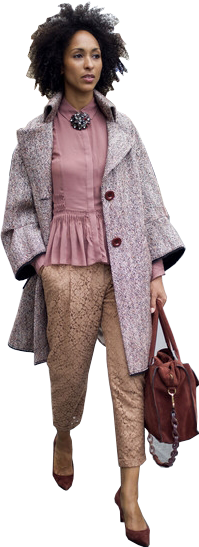

In [26]:
img = Image.fromarray(data)
display(img)

## Crop Algorithm

### Setup

In [2]:
def generate_arr(size):
    edge = np.random.randint(0, size)
    arr = np.zeros(size)
    fill = np.random.randint(low=1, high=255, size=(size-edge,))
    arr[arr.size-fill.size :] = fill
    return arr, edge

In [9]:
for i in range(0, 100):
    arr, edge = generate_arr(np.random.randint(1, 200))
    if arr.size == 1:
        assert(edge == 0)
    elif edge == 0:
        assert(np.all(arr>0))
    else:
        assert(arr[edge] > 0 and arr[edge-1]==0)

In [13]:
def find_edge(arr, reverse=False):
    """Returns the first non-zero index
    """
    left, right = 0, arr.size-1
    while right > left:
        if reverse:
            mid = right - (right-left) // 2
            if arr[mid] != 0:
                left = mid
            else:
                right = mid-1
        else:
            mid = left + (right-left) // 2
            if arr[mid] != 0:
                right = mid
            else:
                left = mid+1
    return left if reverse else right

In [171]:
for i in range(0, 100):
    arr, edge = generate_arr(np.random.randint(1, 2000))
    rev_arr, rev_edge = np.flip(arr), arr.size -1 - edge
    result = find_edge(arr)
    rev_result = find_edge(rev_arr, reverse=True)
    assert(result == edge)
    assert(rev_result == rev_edge)